In [ ]:
#Unified Mentor Data Science Internship- Project ##Cybersecurity: Suspicious Web Threat Interactions

In [38]:
#Importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [40]:
#Load the Data
df=pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [42]:
df.shape

(282, 16)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

Unique values

In [47]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'bytes_in':
[    5602    30912    28506    30546     6526     3906    17748  4767917
    10538     9656    57208    18162    28056    73752     4080  1968903
     6958     8310  4804723    11820     8206    29356    26178    29308
    60068     4043     3102     5528     4926     7724       80    23048
    28444     5824    10474  4190330     5080     4220      952    36745
    12068    57462  2015975     4064    33268     7424  4758826    17736
    60686    21698    28296     4721     9968  4791678    10768     3996
    26354    33777    28762    28478     4288     8874  4793434    16948
     5810    28730    29002    44270  2019990     3498    16698  4794053
     6606     9910    26250    21448    28524     9600     7786    33662
     6480     4018    38560    57088  1215594     3514    13338  4803684
    13132     5238     9052    31076    28518    43660    26820     3206
    35894     9132  4801644    22790    29040    27938    34660  4809606
     6742     4

In [49]:
# Drop columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=columns_to_drop, inplace=True)

In [51]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])

df[['src_ip', 'src_ip_country_code']] = df[['src_ip', 'src_ip_country_code']].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    category           
 5   src_ip_country_code  282 non-null    category           
 6   time                 282 non-null    datetime64[ns, UTC]
dtypes: category(2), datetime64[ns, UTC](3), int64(2)
memory usage: 13.3 KB


Summary Statistics

In [56]:
print(df.describe())

           bytes_in     bytes_out
count  2.820000e+02  2.820000e+02
mean   1.199390e+06  8.455429e+04
std    4.149312e+06  2.549279e+05
min    4.000000e+01  4.400000e+01
25%    5.381500e+03  1.114200e+04
50%    1.318200e+04  1.379950e+04
75%    3.083300e+04  2.627950e+04
max    2.520779e+07  1.561220e+06


Exploratory Data Analysis (EDA)

Distribution of bytes_in and bytes_out

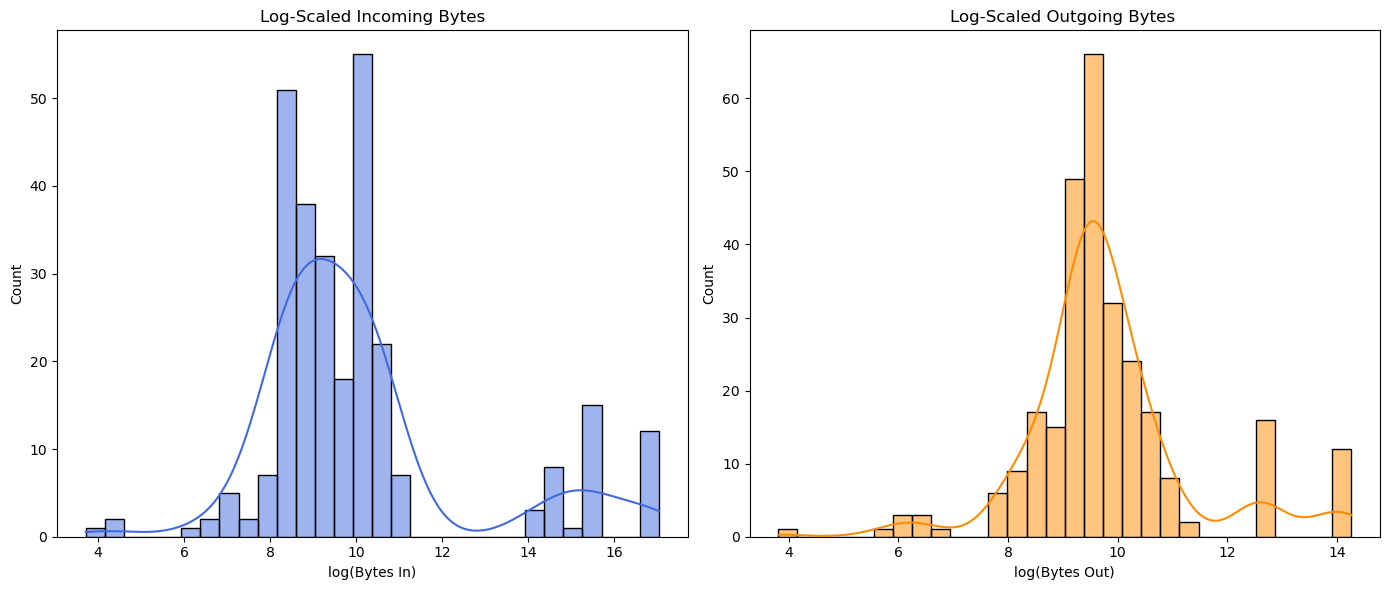

In [59]:

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df['bytes_in']), bins=30, kde=True, color='royalblue')
plt.title('Log-Scaled Incoming Bytes')
plt.xlabel('log(Bytes In)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['bytes_out']), bins=30, kde=True, color='darkorange')
plt.title('Log-Scaled Outgoing Bytes ')
plt.xlabel('log(Bytes Out)')

plt.tight_layout()
plt.show()

Suspicious Traffic Countrywise

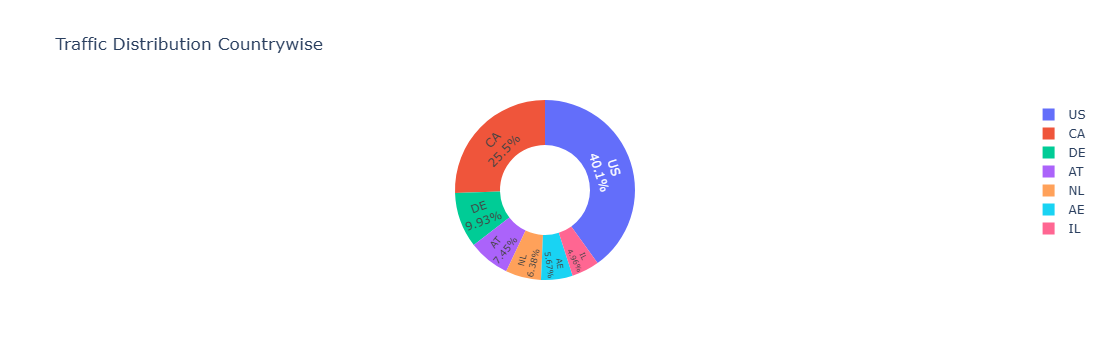

In [69]:
import plotly.express as px

country_summary = df['src_ip_country_code'].value_counts().reset_index()
country_summary.columns = ['Country', 'Count']

fig_pie = px.pie(
    country_summary,
    values='Count',
    names='Country',
    title='Traffic Distribution Countrywise',
    hole=0.5
)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.update_layout(template='plotly_white')
fig_pie.show()

bytes_in bytes_out in country

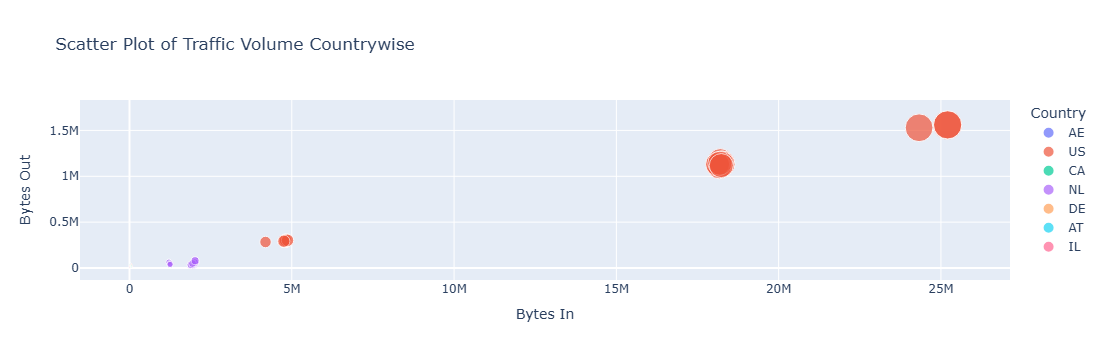

In [74]:
fig_scatter = px.scatter(
    df,
    x='bytes_in',
    y='bytes_out',
    color='src_ip_country_code',
    size='bytes_in',
    hover_data=['src_ip', 'time'],
    title='Scatter Plot of Traffic Volume Countrywise',
    labels={'bytes_in': 'Bytes In', 'bytes_out': 'Bytes Out', 'src_ip_country_code': 'Country'}
)
fig_scatter.show()

Time Series Analysis and Visualization

Detect temporal patterns, such as increased activity at certain hours, to inform alerting systems.

In [78]:
df.set_index('time', inplace=True)
# Resample to hourly aggregates
hourly_traffic = df.resample('H').agg({ #resample('H') groups data into hourly bins based on datetime index,time column must be set as index and in datetime format)
    'bytes_in': 'sum', # total incoming bytes
    'bytes_out': 'sum', #total outgoing bytes
    'src_ip': 'count'#counts no.of requests
    })
hourly_traffic.rename(columns={'src_ip': 'request_count'}, inplace=True)

print(hourly_traffic.head())  # View aggregated data

                           bytes_in  bytes_out  request_count
time                                                         
2024-04-25 23:00:00+00:00  28228629    2329641             58
2024-04-26 00:00:00+00:00  28129112    2330646             51
2024-04-26 01:00:00+00:00  32643614    2555354             56
2024-04-26 02:00:00+00:00         0          0              0
2024-04-26 03:00:00+00:00         0          0              0


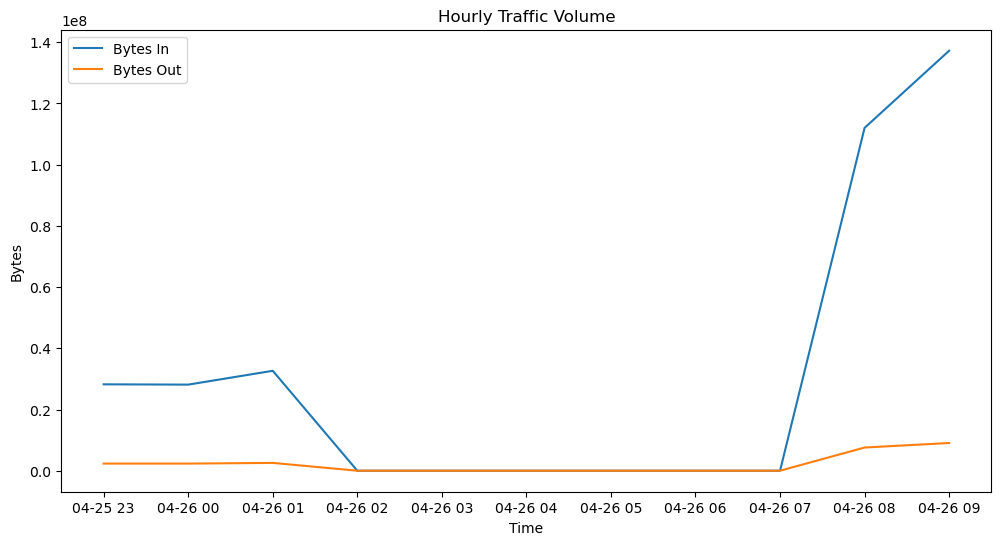

In [80]:
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(hourly_traffic.index, hourly_traffic['bytes_in'], label='Bytes In')
plt.plot(hourly_traffic.index, hourly_traffic['bytes_out'], label='Bytes Out')
plt.title('Hourly Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.show()

To analyse temporal patterns ,the dataset was resampled into hourly intervals using the pandas resample() method. This transformation enables us to observe how traffic volume and request frequency vary over time , which is cruicial for detecting anomalies or peak attack periods.

Rolling average of incoming traffic¶

To smooth out short-term fluctuations and highlight loner-term trends in incoming traffic, a 3 hour rolling average was computed using the pandas . rolling() method.

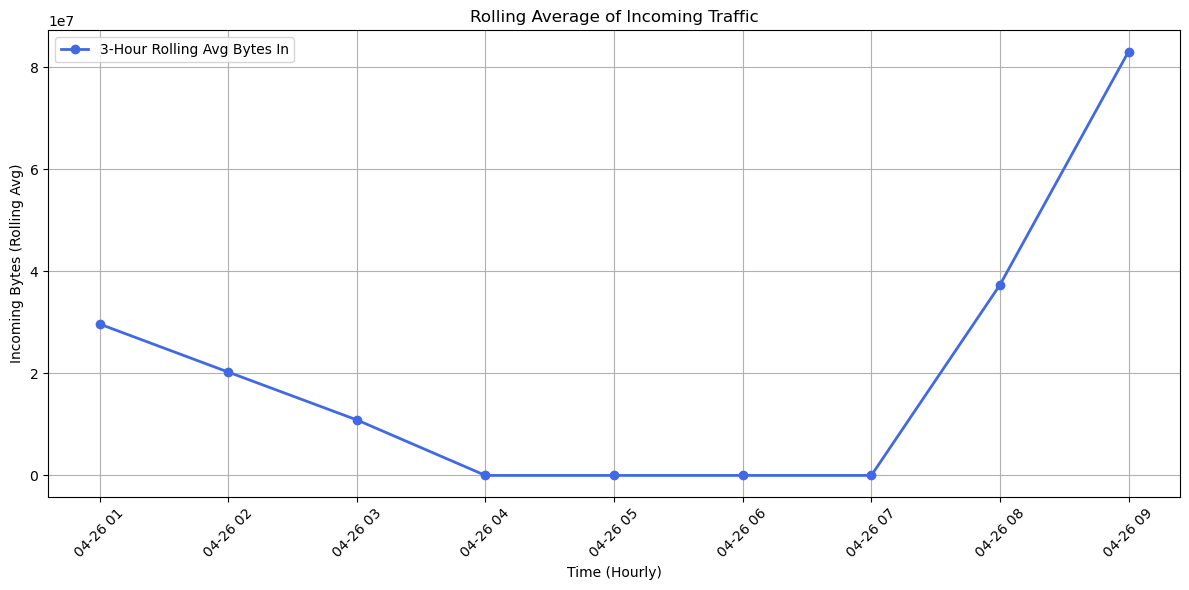

In [84]:
# Compute the 3-hour rolling average
hourly_traffic['bytes_in_rolling'] = hourly_traffic['bytes_in'].rolling(window=3).mean()

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(hourly_traffic.index, hourly_traffic['bytes_in_rolling'], marker='o', color='royalblue', linewidth=2, label='3-Hour Rolling Avg Bytes In')

plt.title('Rolling Average of Incoming Traffic')
plt.xlabel('Time (Hourly)')
plt.ylabel('Incoming Bytes (Rolling Avg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Geographic and IP based analysis

Top IPs by traffic and request volume

In [88]:
ip_summary = df.groupby('src_ip').agg({
    'bytes_in': 'sum',
    'bytes_out': 'sum',
    'src_ip_country_code': 'first'
})

ip_summary['request_count'] = df.groupby('src_ip').size()
ip_summary = ip_summary.sort_values('request_count', ascending=False)

print(ip_summary.head(10))

                  bytes_in  bytes_out src_ip_country_code  request_count
src_ip                                                                  
165.225.209.4       364564     590742                  CA             29
136.226.67.101      664597     836200                  US             28
155.91.45.242    314710879   19551227                  US             28
165.225.26.101      283040     436040                  DE             28
147.161.131.1       143512     234970                  AT             21
165.225.240.79    19639612     721336                  NL             18
136.226.77.103      398090     202778                  CA             17
147.161.161.82      124400     150066                  AE             16
165.225.212.255     484106     174536                  CA             15
94.188.248.74        62116     129572                  IL             14


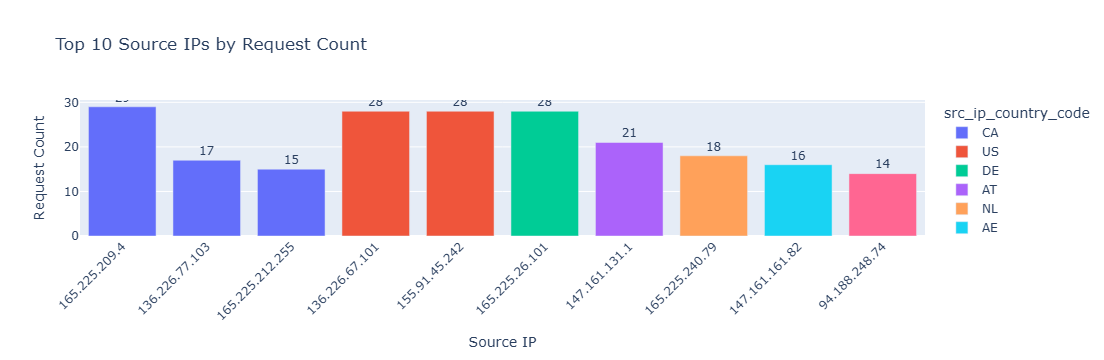

In [90]:
top_ips = ip_summary.head(10).reset_index()

fig = px.bar(
    top_ips,
    x='src_ip',
    y='request_count',
    color='src_ip_country_code',
    text='request_count',
    title='Top 10 Source IPs by Request Count',
    labels={'src_ip': 'Source IP', 'request_count': 'Request Count'},
    height=500
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Anomaly detection with machine learning

In [93]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [95]:
# Feature engineering: Add ratio and aggregate per IP
df['bytes_ratio'] = df['bytes_in'] / (df['bytes_out'] + 1)  # Avoid division by zero
features = df[['bytes_in', 'bytes_out', 'bytes_ratio']]

In [97]:
#Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [99]:
#train isolation forest
model=IsolationForest(contamination=0.02, random_state= 42) #assume 2% anomaly
df['anomaly_score']= model.fit_predict(scaled_features)

In [101]:
# Anomalies are labeled -1
df.reset_index(inplace=True)

anomalies = df[df['anomaly_score'] == -1]
print(anomalies[['src_ip', 'bytes_in', 'bytes_out', 'time']])  # View

             src_ip  bytes_in  bytes_out                      time
36    155.91.45.242   4190330     283456 2024-04-25 23:30:00+00:00
132  165.225.240.79   1889834      34306 2024-04-26 01:20:00+00:00
169   155.91.45.242  18201558    1170896 2024-04-26 08:00:00+00:00
257   155.91.45.242  24326941    1529035 2024-04-26 09:30:00+00:00
267   155.91.45.242  25199191    1557598 2024-04-26 09:40:00+00:00
279   155.91.45.242  25207794    1561220 2024-04-26 09:50:00+00:00


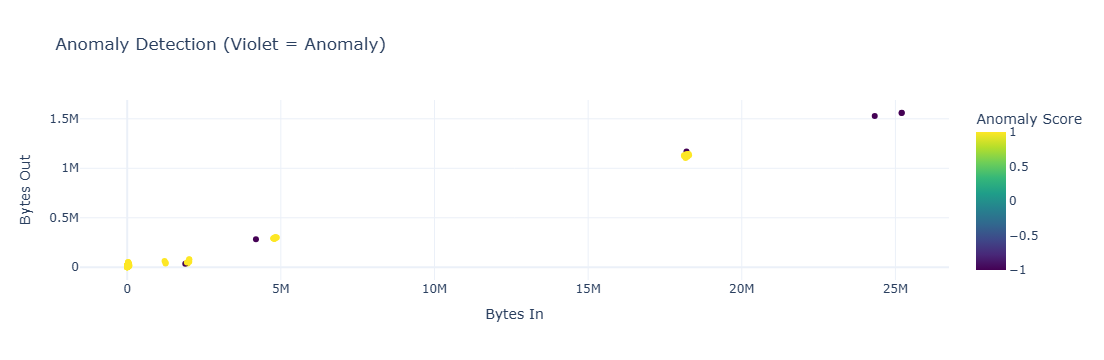

In [103]:
fig = px.scatter(
    df,
    x='bytes_in',
    y='bytes_out',
    color='anomaly_score',
    color_continuous_scale='Viridis',
    title='Anomaly Detection (Violet = Anomaly)',
    labels={'bytes_in': 'Bytes In', 'bytes_out': 'Bytes Out', 'anomaly_score': 'Anomaly Score'},
    height=600
)

fig.update_layout(
    xaxis_title='Bytes In',
    yaxis_title='Bytes Out',
    coloraxis_colorbar=dict(title='Anomaly Score'),
    template='plotly_white'
)

fig.show()

Predictive modeling for traffic forecasting

Predict attack volumes

In [106]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
result = adfuller(hourly_traffic['bytes_in'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, difference the series
d = 0 if result[1] < 0.05 else 1

ADF Statistic: -0.07233638033633105
p-value: 0.9521251732786075


Augmented Dickey-Fuller (ADF) Test

The ADF test checks whether a time series (like bytes_in) is stationary. Stationarity is crucial for ARIMA models to work properly.

ADF Statistic: A negative number. The more negative, the more likely the series is stationary.

p-value: If it's less than 0.05, the series is considered stationary.

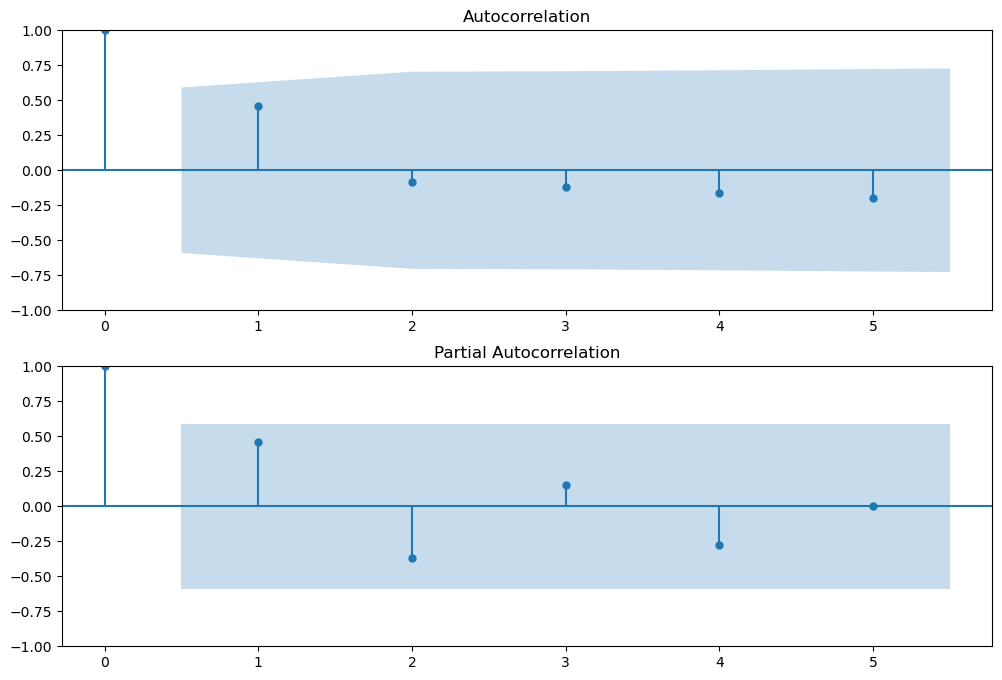

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(hourly_traffic['bytes_in'], lags=5, ax=ax1)  # Reduced lags
plot_pacf(hourly_traffic['bytes_in'], lags=5, ax=ax2) # Reduced lags
plt.show()

ACF (Autocorrelation Function)

ACF measures how current values in a time series are related to past values (lags).Helps identify patterns like seasonality or repeated behavior.

PACF (Partial Autocorrelation Function)

PACF measures the direct relationship between current and lagged values, removing the influence of intermediate lags.Helps decide how many lag terms to include in the AR (autoregressive) part of ARIMA.

In [112]:
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA model
model = ARIMA(hourly_traffic['bytes_in'], order=(1, 1, 1))
model_fit = model.fit()

In [114]:
# Forecast next 5 hours
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-04-26 10:00:00+00:00    1.429262e+08
2024-04-26 11:00:00+00:00    1.442702e+08
2024-04-26 12:00:00+00:00    1.445865e+08
2024-04-26 13:00:00+00:00    1.446610e+08
2024-04-26 14:00:00+00:00    1.446785e+08
Freq: h, Name: predicted_mean, dtype: float64


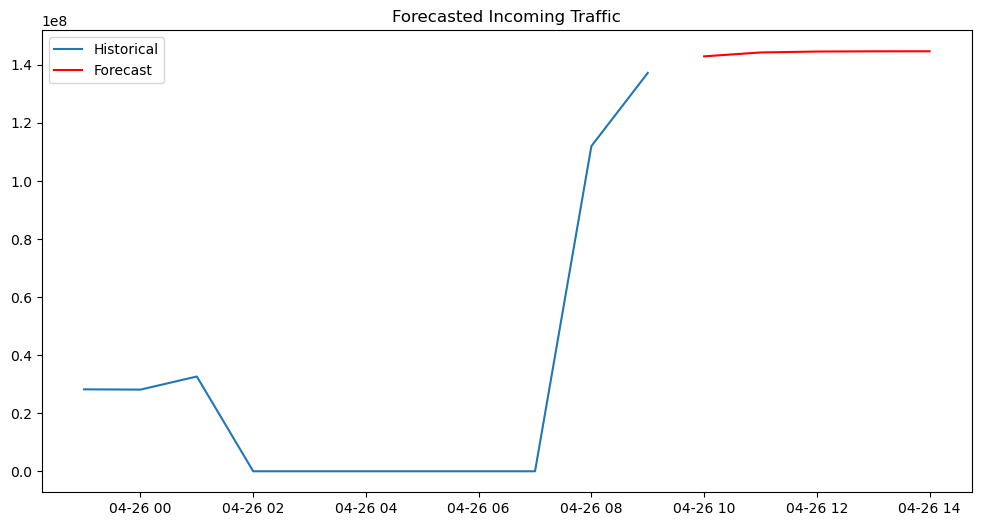

In [116]:
#Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_traffic.index, hourly_traffic['bytes_in'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Forecasted Incoming Traffic')
plt.legend()
plt.show()

Key Insights from Cybersecurity Traffic Analysis
Data Cleaning: Removed redundant columns with constant values to streamline analysis.

Exploratory Analysis:

Incoming (bytes_in) and outgoing (bytes_out) traffic showed heavy-tailed distributions.

Top source IPs were concentrated in North America and Europe, with unusually high request volumes.

Geographic Analysis:

Majority of suspicious traffic originated from US, CA, DE, NL, AE.

Pie and scatter plots revealed country-wise traffic patterns and volume clusters.

Anomaly Detection:

Used Isolation Forest to flag IPs with abnormal traffic ratios.

IP 155.91.45.242 showed repeated high-volume anomalies across multiple timestamps.

Time Series Forecasting:

Resampled traffic into hourly intervals to detect temporal patterns.

ADF test confirmed non-stationarity → applied differencing (d=1).

ACF and PACF plots suggested ARIMA(1,1,1) model.

Forecast showed stable high-volume traffic, aiding proactive monitoring.

Modeling Impact:

Combined statistical analysis, machine learning, and time series modeling to transform raw logs into actionable insights.

Enabled early detection of threats and informed alerting strategies.